# Data Analysis with Python

## 1. import the data

In [6]:
#install specific version of libraries used in lab
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2970 sha256=aee556abd79117a632cf30fbe8791695aadf4080b5e8d88edbc3350c2d3e5423
  Stored in directory: c:\users\dewif\appdata\local\pip\cache\wheels\5c\47\e1\386fa7740f1947ad87d16c68041c16ad8c23ca2bfd139a3fe5
Successfully built sklearn


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [5]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [12]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [15]:
df = pd.read_csv(path, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Analyzing Individual Feature Patterns Using Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# list the data types for each colum
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [16]:
# data type of the column "peak-rpm"
df['peak-rpm'].dtypes

dtype('float64')

In [17]:
# calculate the correlation between variables type "int64" or "float64" using method "Corr"
df.corr()

C:\Users\dewif\AppData\Local\Temp\ipykernel_16812\1668326788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [19]:
# correlation between column bore, stroke, compression-ratio, and horsepower
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Positive LInear Relationship

(0.0, 53208.648334606696)

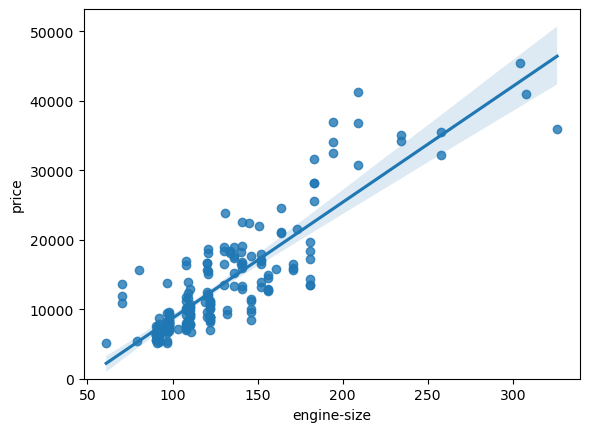

In [20]:
# engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [21]:
# examine the correlation
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

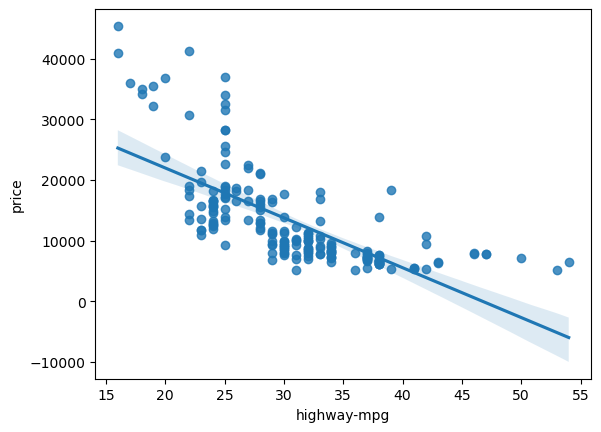

In [23]:
# scatterplot of "highway-mpg" and price
sns.regplot(x="highway-mpg", y= "price", data=df)

In [25]:
# examine the correlation
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Weak linear Relationship

<Axes: xlabel='peak-rpm', ylabel='price'>

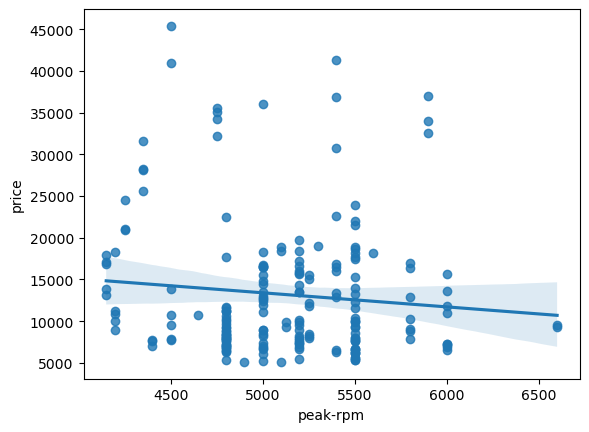

In [26]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [27]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [28]:
# correlation between stroke and price
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

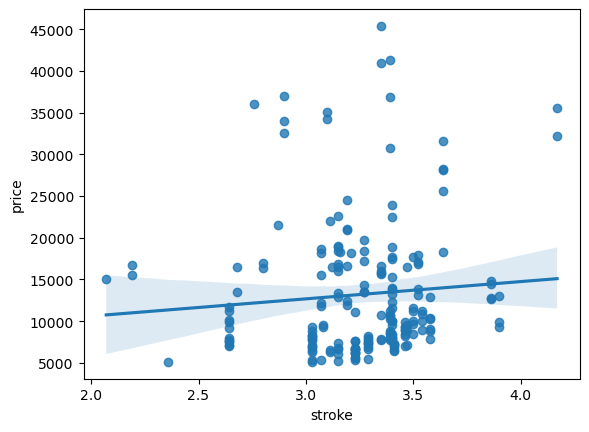

In [29]:
sns.regplot(x="stroke", y="price", data=df)

### Categorical variables

<Axes: xlabel='body-style', ylabel='price'>

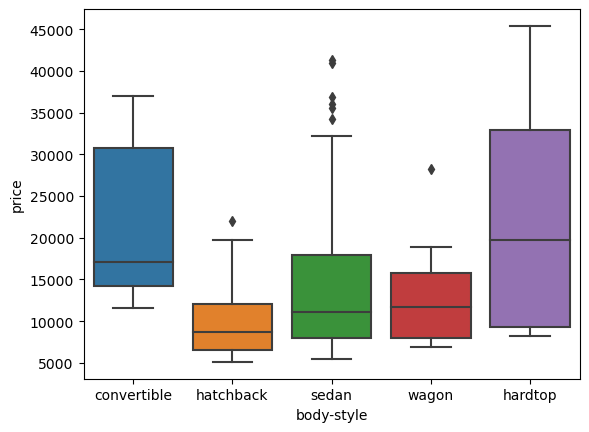

In [31]:
sns.boxplot(x="body-style", y="price", data=df)

disribusi price antara kategori body-style yang berbeda memiliki tumpang tindih yang signifikan, shingga body-style bukan prediktor yang baik.

<Axes: xlabel='engine-location', ylabel='price'>

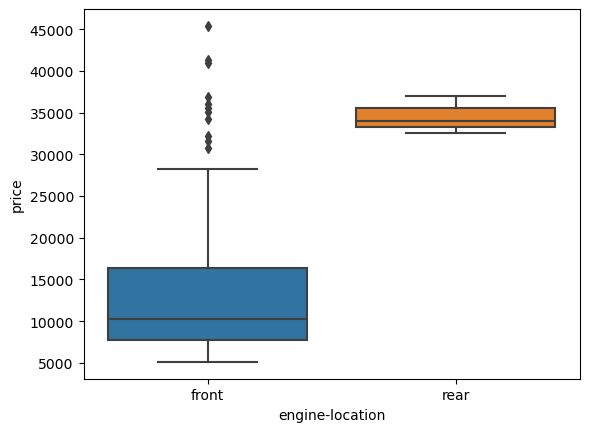

In [32]:
sns.boxplot(x="engine-location", y="price", data=df)

distribusi dari harga antara fua kategori engine-location ini, depan dan belakang, cukup berbeda shg engine-location prediktor price yang potensial

<Axes: xlabel='drive-wheels', ylabel='price'>

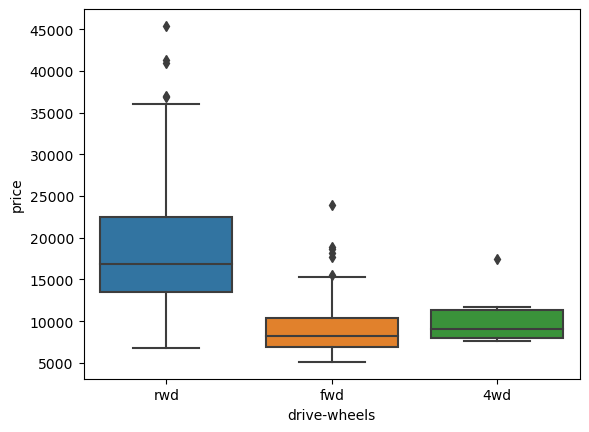

In [33]:
sns.boxplot(x="drive-wheels", y="price", data=df)

distribusi harga antara berbagai kategori drive-wheels berbeda. maka drive-wheels prediktor harga yang potensial

## 3. Descriptive Statistical Analysis

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

In [34]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [35]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### value counts 

In [36]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [38]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [41]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [42]:
# rename the index
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [47]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns= {'engine-location': 'value-counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value-counts
engine-location,
front,198
rear,3


# 4. Basics Grouping

In [48]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [50]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

# grouping the results
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

C:\Users\dewif\AppData\Local\Temp\ipykernel_16812\1661937932.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [57]:
# grouping results
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [55]:
grouped_pivot  = grouped_test1.pivot(index='drive-wheels', columns= 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [56]:
# fill missing value
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [59]:
# find the average "price" of each car based on "body-style".
df_group_two = df[['body-style', 'price']]
grouped_test2 = df_group_two.groupby(['body-style'], as_index = False).mean()
grouped_test2

,body-style,price
0,convertible,17772.300000
1,hardtop,16225.857143
2,hatchback,10112.388511
3,sedan,14723.655556
4,wagon,12029.101852


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

## variables: drive wheels and body style vs. price

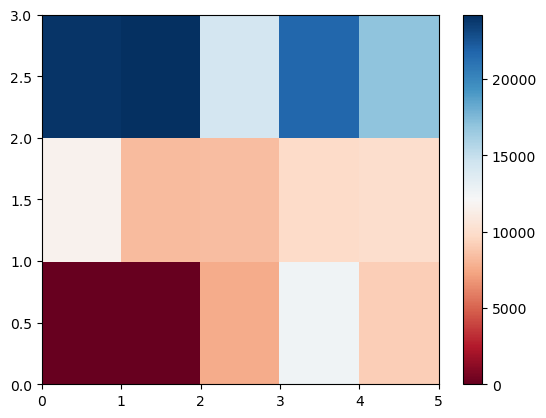

In [61]:
# use the grouped result to make a heat maps
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

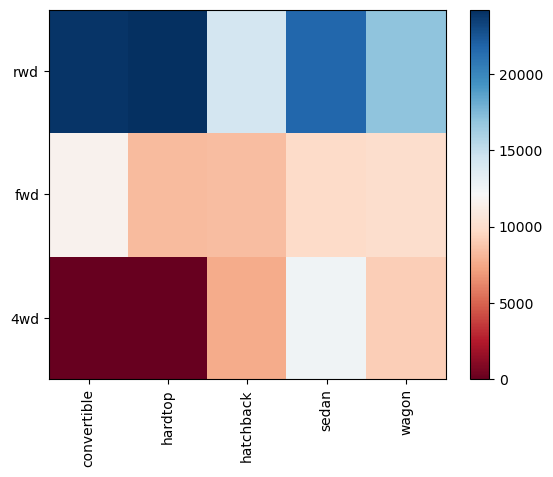

In [62]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move tricks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 5. Correlation and Cuasation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

### Pearson Correlation

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

In [63]:
df.corr()

C:\Users\dewif\AppData\Local\Temp\ipykernel_16812\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price
price,1.0


### P-value

By convention, when the

- p-value is  < 0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  < 0.05: there is moderate evidence that the correlation is significant.
- the p-value is  < 0.1: there is weak evidence that the correlation is significant.
- the p-value is  > 0.1: there is no evidence that the correlation is significant.

In [266]:
from scipy import stats

## Wheel-base vs. Price

In [267]:
pearson_coef, p_value = stats.pearsonr(df['price'], df['wheel-base'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


## 6. ANOVA: Analysis of Variance

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

In [71]:
# drive-wheels
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,23949.600000
9,rwd,24202.714286


In [72]:
df_gptest

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [73]:
grouped_test2.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [76]:
# anova
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print("ANOVE results: F=", f_val, ", P =", p_val)

ANOVE results: F= 17.54495590883977 , P = 0.0005365411925421271


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance


In [77]:
#  fwd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.75473847377244 , P = 0.0008505298615827271


In [78]:
# 4wd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 13.603994177561603 , P = 0.010228629764546682


# MODEL DEVELOPMENT

## 1. Linear Regression and Multiple Linear Regression

**Linear Regression**
One example of a Data Model that we will be using is:

**Simple Linear Regression**
Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable.

X: response Variable
Y: predictor variabel

**Linear Function**

Yhat = a +bX

- a refers to the intercept of the regression line, in other words: the value of Y when X is 0
- b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [16]:
# load the modules for linear regression

from sklearn.linear_model import LinearRegression

In [17]:
# create the linear regression object

lm = LinearRegression()
lm

LinearRegression()

In [18]:
# how could "highway-mpg" help us predict car price?

X = df[['highway-mpg']]
Y = df[['price']]

In [19]:
lm.fit(X,Y)

LinearRegression()

In [21]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [22]:
# what is the value of the intercept (a)

lm.intercept_

array([38423.30585816])

In [23]:
# what is the value of the slope (b)
lm.coef_

array([[-821.73337832]])

In [25]:
# create a linaer regression object called "lm1"
lm1= LinearRegression()
lm1

LinearRegression()

In [27]:
# train the model using "engine-size as the independent variable and "price" as the dependent variable

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [46]:
# intercept
lm1.intercept_

array([-7963.33890628])

In [47]:
# slope
lm1.coef_

array([[166.86001569]])

In [48]:
# equation of the predicted line
# using x and y
Yhat = -7963.39 + 166.86*X

Price =-7963.39 + 166.86*df['engine-size']

## Multiple Linear Regression 

In [34]:
# Let's develop a model using these variables as the predictor variables.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [35]:
# fit the linear model using the four above-mentioned variables

lm.fit(Z, df['price'])

LinearRegression()

In [36]:
# intercept
lm.intercept_

-15806.624626329194

In [37]:
# slope 
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [44]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [45]:
# find the coefficien
lm2.coef_

array([   1.49789586, -820.45434016])

## 2. Model Evaluation Using Visualization

In [49]:
# import the visualization package: seaborn

import seaborn as sns
%matplotlib inline

(0.0, 48176.04158637544)

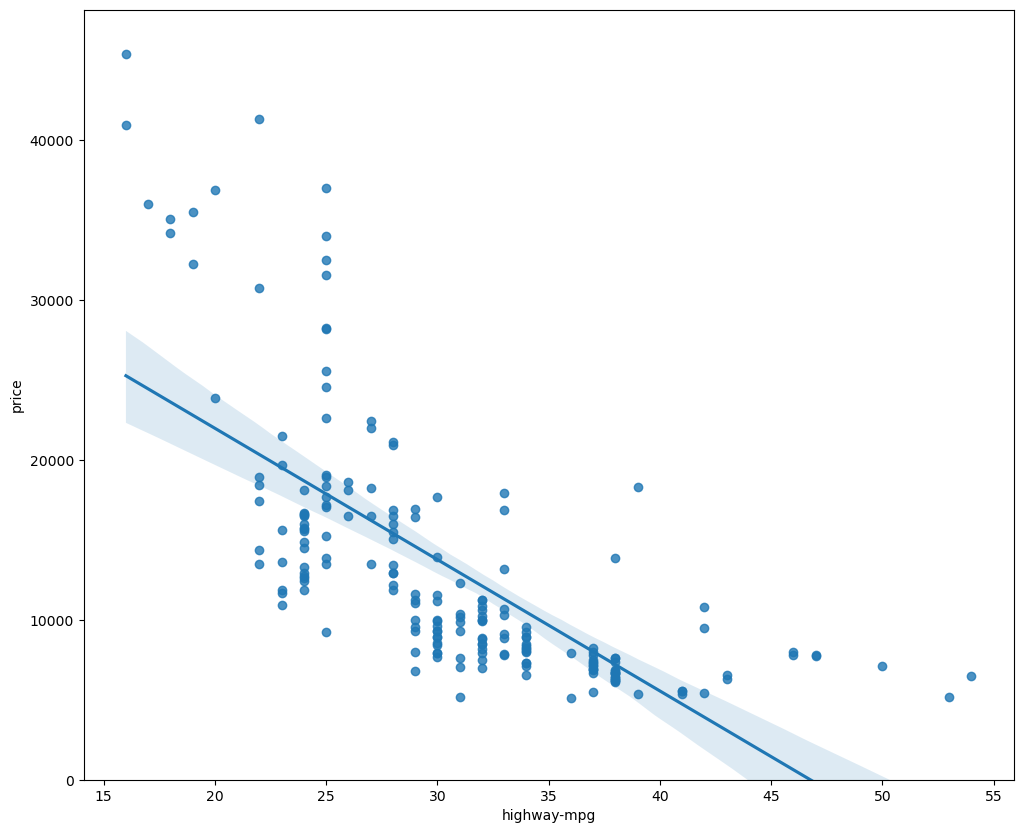

In [55]:
# regression plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Satu hal yang perlu diingat saat melihat plot regresi adalah memperhatikan seberapa tersebarnya titik-titik data di sekitar garis regresi. Ini akan memberi Anda indikasi yang baik tentang varians data dan apakah model linier paling cocok atau tidak. Jika data terlalu jauh dari garis, model linier ini mungkin bukan model terbaik untuk data ini.

(0.0, 47414.1)

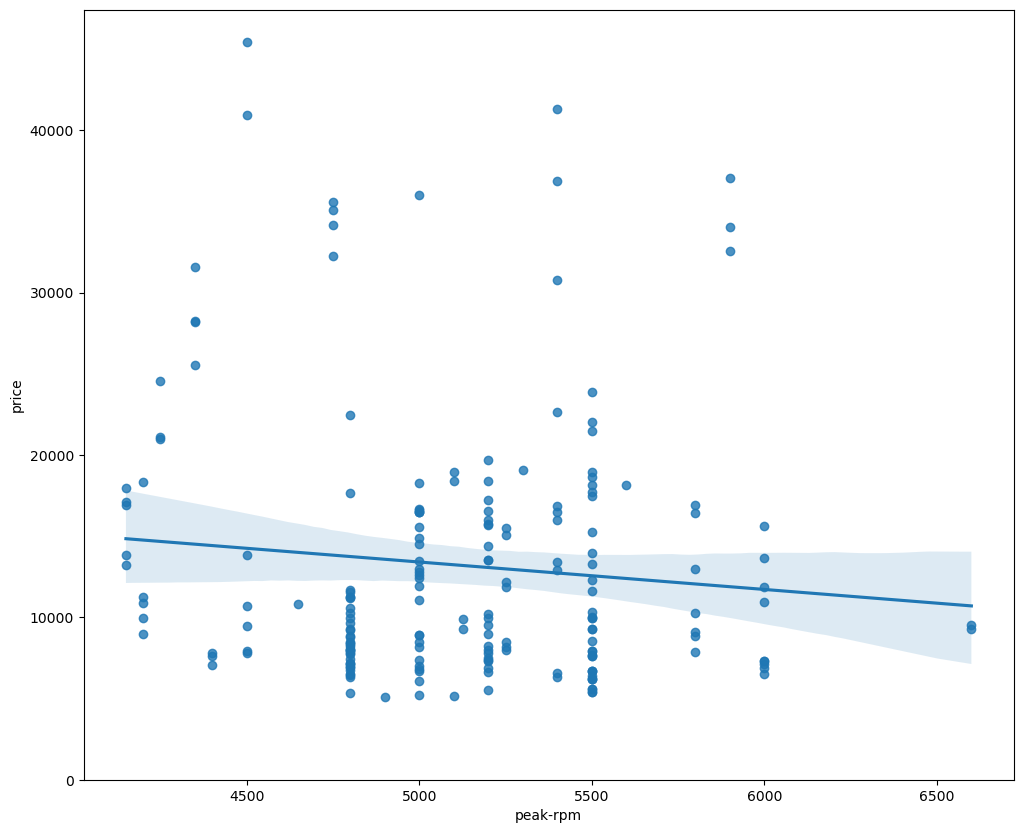

In [56]:
# regression plot of peak-rpm

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Titik-titik untuk "peak-rpm" memiliki lebih banyak penyebaran di sekitar garis yang diprediksi dan jauh lebih sulit untuk menentukan apakah titik-titik tersebut menurun atau meningkat ketika "peak-rpm" meningkat.

In [58]:
# is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616

### Residual plot

Apa itu residu?

Selisih antara nilai teramati (y) dan nilai prediksi (Yhat) disebut residual (e). Saat kita melihat plot regresi, residualnya adalah jarak dari titik data ke garis regresi yang dipasang.

Jadi apa itu residual plot?

Plot residual adalah grafik yang menunjukkan residual pada sumbu y vertikal dan variabel independen pada sumbu x horizontal.

Apa yang kita perhatikan ketika melihat residual plot?

Kami melihat penyebaran residu:

- Jika titik-titik dalam plot residual tersebar secara acak di sekitar sumbu x, maka model linier sesuai untuk data tersebut.

Mengapa demikian? Residual yang tersebar secara acak berarti variansnya konstan, dan dengan demikian model linier cocok untuk data ini.

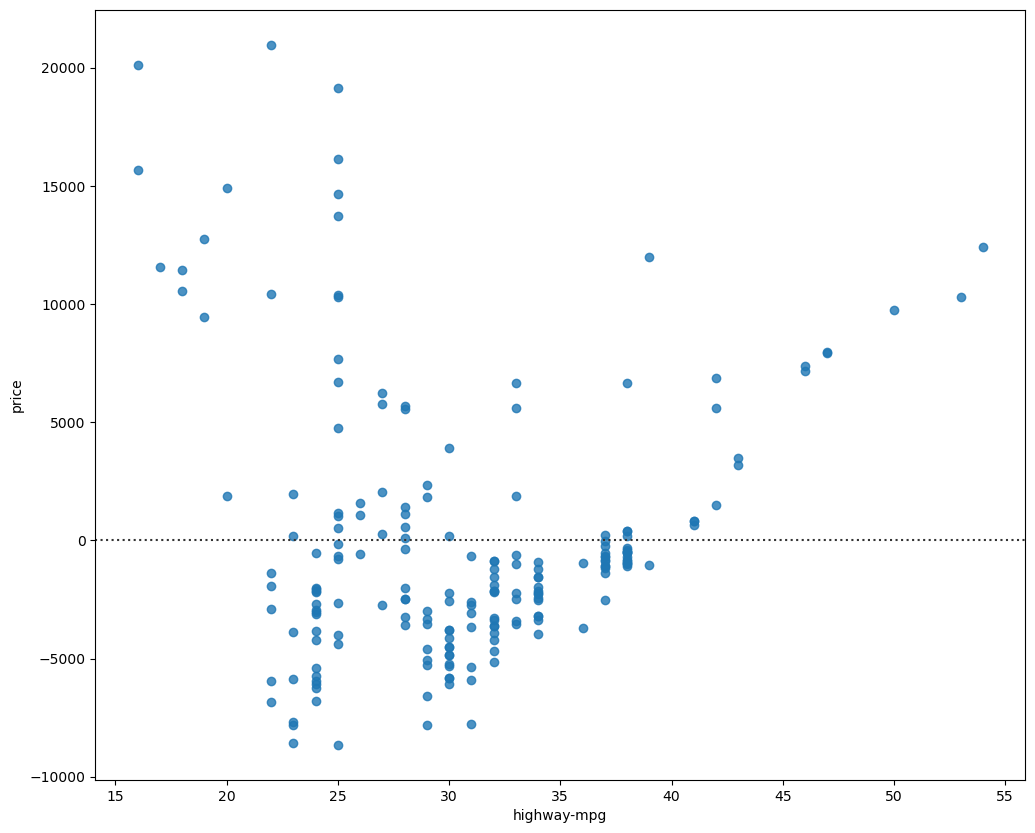

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Kita dapat melihat dari plot residual ini bahwa residual tidak tersebar secara acak di sekitar sumbu x, membuat kita percaya bahwa mungkin model non-linear lebih cocok untuk data ini.

## Multiple Linear Regression

In [62]:
# use distribution plot 

# first, make a prediction
Y_hat = lm.predict(Z)

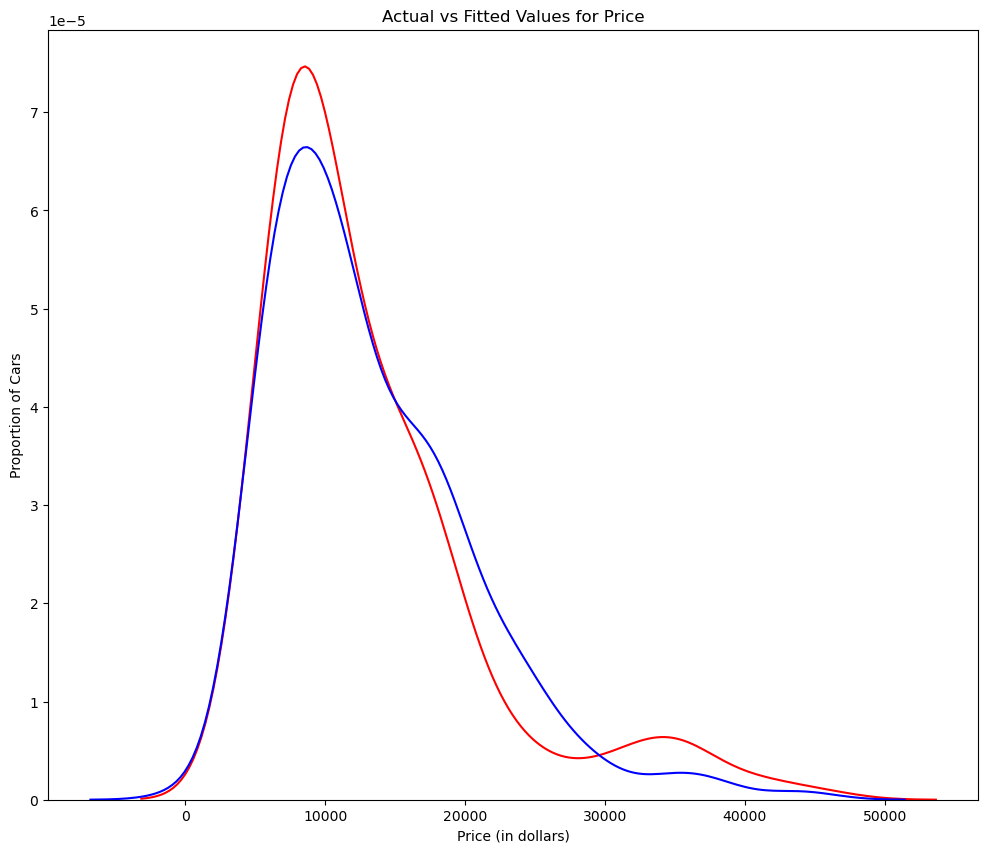

In [64]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Kita dapat melihat bahwa nilai yang dipasang cukup dekat dengan nilai sebenarnya karena kedua distribusi sedikit tumpang tindih. Namun, pasti ada ruang untuk perbaikan.

## 3. Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [130]:
# mendefinisikan PlotPolly dengan parameter yang ada pada ()
def PlotPolly(model, independent_variable, dependent_variable, Name):
#     menghasilkan array nilai x_new dan y_new antara 15 hingga 55.
# array terdiri dari 100 elemen
    x_new = np.linspace(15, 55, 100)
#     menghasilkan array nilai y_new untuk menghitung nilai prediksi 
# menggunakan model, model digunakan untuk memprediksi nila y berdasarkan 
# nilai x_new
    y_new = model(x_new)
    
#     memplot data yang ada dan model prediksi
# memplot data asli menggunakan titik
# Memplot model prediksi menggunakan garis lurus ('-').
# Data asli diwakili oleh pasangan nilai independent_variable dan dependent_variabble.
# Model prediksi diwakili oleh pasangan nilai x_new dan y_new.
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
#    mendapatkan objek sumbu
    ax = plt.gca()
#     menetapkan warna latar belakang sumbu (RGB)
    ax.set_facecolor((0.898, 0.898, 0.898))
#    mendapatkan objek gamabr
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
#     Menampilkan plot yang telah dibuat.
    plt.show()
#     Menutup plot yang ditampilkan.
    plt.close()

In [131]:
# lets get the variable
x = df['highway-mpg']
y = df['price']

In [132]:


#  fit the polynomial using the function polyfit
f = np.polyfit(x, y, 3)
# use the function poly1d to display the polynomial function.
p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


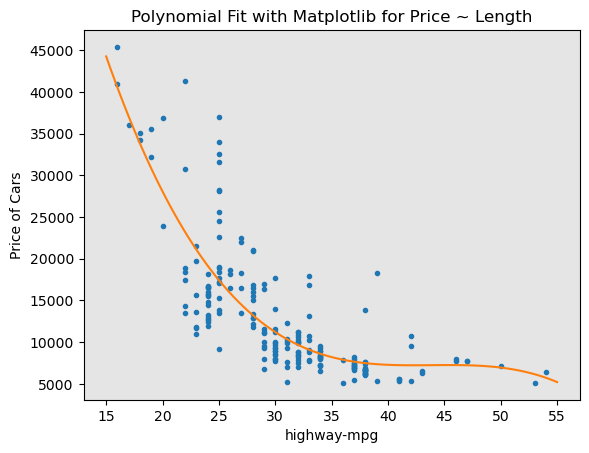

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [133]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

Kita sudah dapat melihat dari plotting bahwa model polinomial ini bekerja lebih baik daripada model linier. Ini karena fungsi polinomial yang dihasilkan "memukul" lebih banyak titik data.

### Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


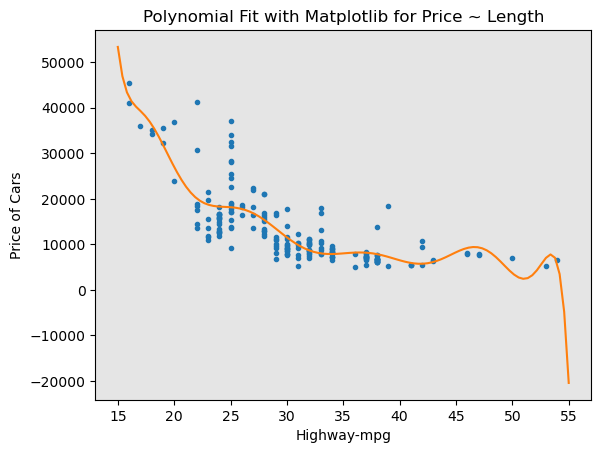

In [134]:
f1 = np.polyfit(x, y, 11)

p1 = np.poly1d(f1)

print(p1)

PlotPolly(p1, x, y, 'Highway-mpg')



## Multivariate Polynom

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
# create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures (degree=2)
pr

PolynomialFeatures()

In [80]:
Z_pr = pr.fit_transform(Z)

In [81]:
Z.shape

(201, 4)

In [82]:
Z_pr.shape

(201, 15)

## Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [93]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [94]:
# input the list as an argument to the pipeline constructor:

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Pertama, kita mengonversi tipe data Z ke tipe float untuk menghindari peringatan konversi yang mungkin muncul akibat StandardScaler mengambil input float.

Kemudian, kita dapat menormalkan data, melakukan transformasi, dan menyesuaikan model secara bersamaan.

In [95]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [96]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [97]:
Input = [('scale', StandardScaler()),
        ('model', LinearRegression())]
        
pipe=Pipeline(Input)
pipe.fit(Z, y)

ypipe =pipe.predict(Z)
ypipe[0:10]
        
        

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Measures for In-Sampe Evaluation

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [98]:
# lets calculate the R^2

# highway-mpg_fit
lm.fit(X, Y)
# find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [99]:
# lets calculate the MSE 

Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [100]:
# Let's import the function mean_squared_error from the module metrics:

from sklearn.metrics import mean_squared_error

In [101]:
# We can compare the predicted results with the actual results:

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


## Modul 2: Multiple Linear Regression

In [103]:
# let's calculate the R^2

# fit the model
lm.fit(Z, df['price'])
# find the r^2
print('The R-Squared is: ', lm.score(Z, df['price']))

The R-Squared is:  0.8093562806577457


In [104]:
# lets calculate the mse:

# we product a prediction
Y_predict_multifit = lm.predict(Z)

In [105]:
# We compare the predicted results with the actual results:

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


## Model 3: Polynomial Fit

In [106]:
# lets calculate the r^2

# Let’s import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [107]:
# we apply the func to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


Kita dapat mengatakan bahwa ~67,419 % variasi harga dijelaskan oleh polinomial fit ini.

## MSE

In [108]:
mean_squared_error(df['price'], p(x))

20474146.426361226

## 5. Prediction and Decision Making

Prediction
Pada bagian sebelumnya, kami melatih model menggunakan metode fit. Sekarang kita akan menggunakan metode predict untuk menghasilkan sebuah prediksi. Mari impor pyplot untuk plotting; kami juga akan menggunakan beberapa fungsi dari numpy.

In [114]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [126]:
# create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [127]:
# fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [128]:
# produce a prediction

yhat=lm.predict(new_input)
yhat[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

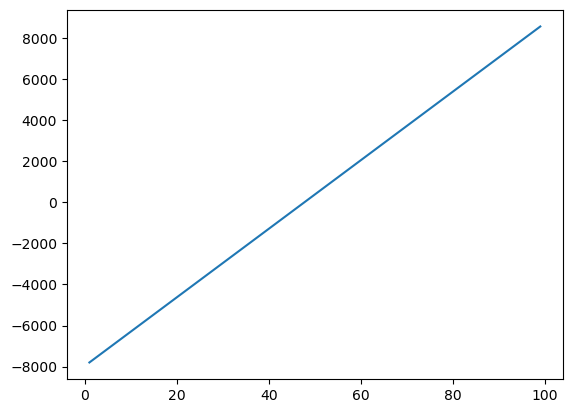

In [129]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

sumbunya kebalik gataw knapa hiks;(

### Decision Making: Determining a Good Moddel Fit

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

## Conclusion
Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

# MODEL EVALUATION AND REFINEMENT

In [135]:
!pip install ipywidgets
!pip install tqdm

In [136]:
# let's only use numeric data

df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [138]:
# libraries for plotting 
from ipywidgets import interact, interactive, fixed, interact_manual

## Function for Plotting


In [198]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
#     lebar gambar
    width = 12
#     tinggi gambar
    height = 10
    plt.figure(figsize=(width, height))
    
#     plot distribusi dengan data RedFunction
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
#     plot distribusi dengan data BlueFunction
# ax=ax1 artinya menggabungkan kedua plot di satu gambar
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price(in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [211]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
#     training data
#     testing data
#     lr: linear regression object
#     poly_transform: polynomial transformation object



# menghitung nilai maksimum dari xtrain dan xtest 
    xmax=max([xtrain.values.max(), xtest.values.max()])
    
#     menghitung nilai minimum dari xtrain dan xtest
    xmin=min([xtrain.values.min(), xtest.values.min()])
    
#     membuat array x yang berisi rentang nilai mulai dari xmin hingga xmax dengan interval 0.1 antara setiap nilai
    x=np.arange(xmin, xmax, 0.1)
    
#     menggambar scatter plot dari xtrain dan ytrain dengan marker berwarna merah (ro) untuk data pelatihan
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    
#    Menggambar scatter plot dari xtest dan y_test dengan marker berwarna hijau ('go') untuk data pengujian. 
    plt.plot(xtest, y_test, 'go', label='Test Data')
    
#     Menggambar plot dari prediksi model regresi linear (lr) menggunakan transformasi polinomial (poly_transform) pada array x.
# poly_transform.fit_transform(x.reshape(-1, 1)) mengubah array x menjadi bentuk transformasi polinomial yang sesuai dengan model.
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    
#     mengatur batas sumbu y pada plot 
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    
#     menambahkan legenda pada plot 
    plt.legend()

## Part 1: Training dan Testing

Langkah penting dalam menguji model Anda adalah membagi data Anda menjadi data pelatihan dan pengujian. Kami akan menempatkan harga data target dalam kerangka data terpisah y_data:

In [142]:
y_data = df['price']

In [143]:
# drop price data in dataframe x_data:
x_data=df.drop('price', axis=1)

In [144]:
# split data secara random menjadi training dan testing data dengan func

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test sample :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test sample : 21
number of training samples: 180


In [146]:
# split up the data set such that 40% of the data samples will bu utilized for testing. set parameter "random_state =0"
x_train1, x_test1, y_train1, y_test1= train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("number of test sample :", x_test1.shape[0])
print("number of training samples:", x_train1.shape[0])

number of test sample : 81
number of training samples: 120


In [152]:
# import LinearRegression from the module linear_model
# from sklearn.linear_model import LinearRegression

In [153]:
# lre=LinearRegression()
# UDAH DI ATAS

In [155]:
# fit the model using the features horsepower

lm.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [156]:
# let's calculate R^2 on the test data

lm.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [157]:
# R^2 on the train data

lm.score(x_train[['horsepower']], y_train)

0.6619724197515103

R^2 lebih kecil menggunakan test data jika dibandingkan training data

In [160]:
# find the R^2 on the test data using 40% of dataset

lm.fit(x_train1[['horsepower']], y_train1)
lm.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

## Cross-Validation Score


Terkadang Anda tidak memiliki data pengujian yang memadai; akibatnya, Anda mungkin ingin melakukan validasi silang. Mari kita membahas beberapa metode yang dapat Anda gunakan untuk validasi silang.


In [162]:
# import model_selection from the module cross_val_score

from sklearn.model_selection import cross_val_score

In [163]:
Rcross = cross_val_score(lm, x_data[['horsepower']], y_data, cv=4)

In [164]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [165]:
# calculate the average and std of our estimate

print("The mean of the folds are", Rcross.mean(), "and the std of the folds is", Rcross.std())

The mean of the folds are 0.522009915042119 and the std of the folds is 0.2911839444756029


In [166]:
# Kita dapat menggunakan kesalahan kuadrat negatif sebagai skor dengan menyetel metrik parameter 'score' menjadi 'neg_mean_squared_error'.

-1* cross_val_score(lm, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [167]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

Rcross1 = cross_val_score(lm, x_data[['horsepower']], y_data, cv=2)

In [168]:
Rcross1

array([0.59015621, 0.44319613])

In [169]:
print("the mean:", Rcross1.mean())

the mean: 0.5166761697127429


In [170]:
# predict

from sklearn.model_selection import cross_val_predict

In [171]:
yhat = cross_val_predict(lm, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting, and Model Selection

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [187]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [188]:
# prediction using training data:

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [189]:
# prediction using test data

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Mari lakukan beberapa evaluasi model menggunakan data pelatihan dan pengujian kami secara terpisah. Pertama, kami mengimpor perpustakaan seaborn dan matplotlib untuk merencanakan.

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

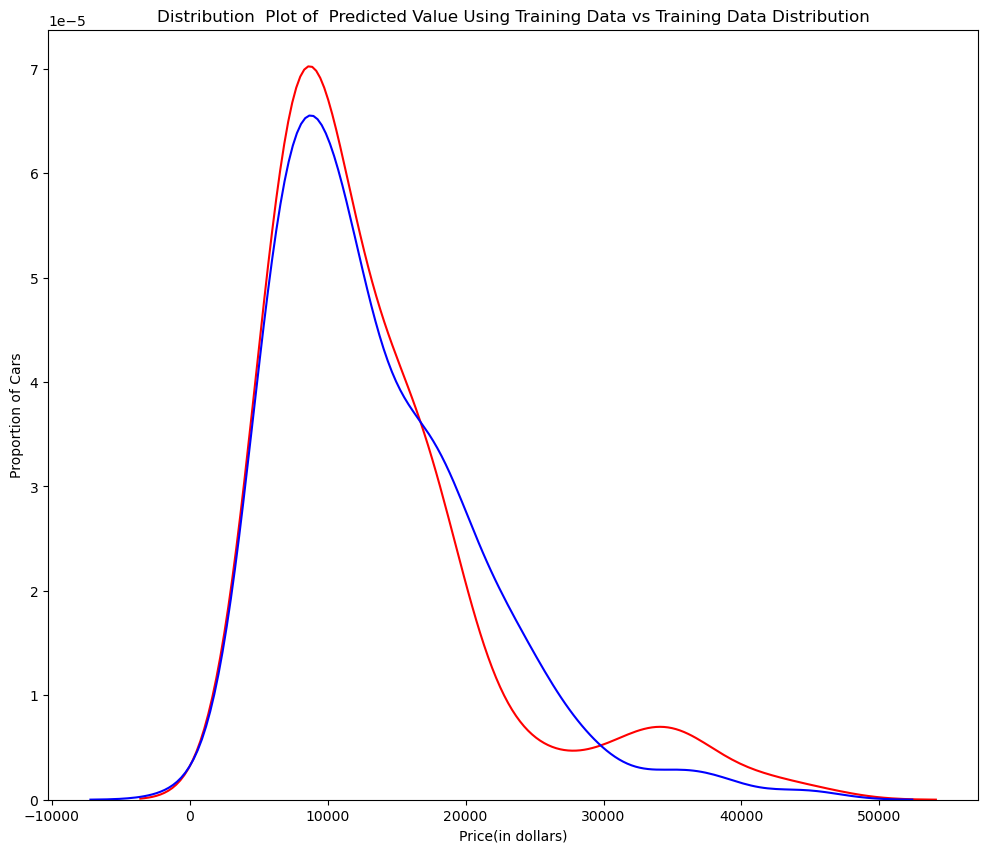

In [199]:
# examine the distribution of the predicted values of the training data

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

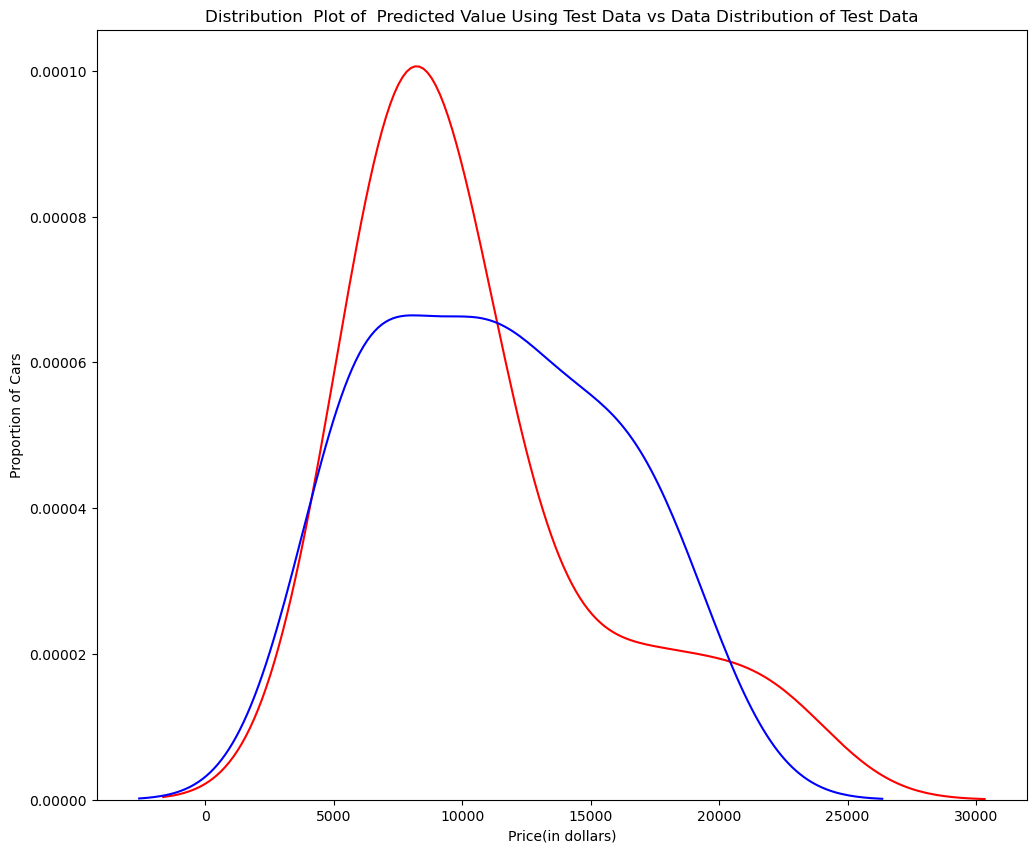

In [200]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

membandingkan Gambar 1 dan Gambar 2, terlihat bahwa distribusi data uji pada Gambar 1 jauh lebih baik dalam menyesuaikan data. Perbedaan pada Gambar 2 ini terlihat jelas pada kisaran 5.000 hingga 15.000. Di sinilah bentuk distribusinya sangat berbeda.

apakah regresi polinomial juga menunjukkan penurunan akurasi prediksi saat menganalisis kumpulan data uji.

In [201]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [203]:
# we will perform a degree 5 polynomial transformation on the featur 'horsepower'

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [204]:
# lest create a linear regression model "poly" and train it

poly = LinearRegression()
poly.fit(x_train_pr, y_train)


LinearRegression()

In [206]:
# see the output 
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70635688,  7308.02977067, 12213.7853793 , 18893.18863048,
       19995.88664009])

In [207]:
# lets take the first five predicted values and compare it to the actual targets

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70635688  7308.02977067 12213.7853793  18893.18863048]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function

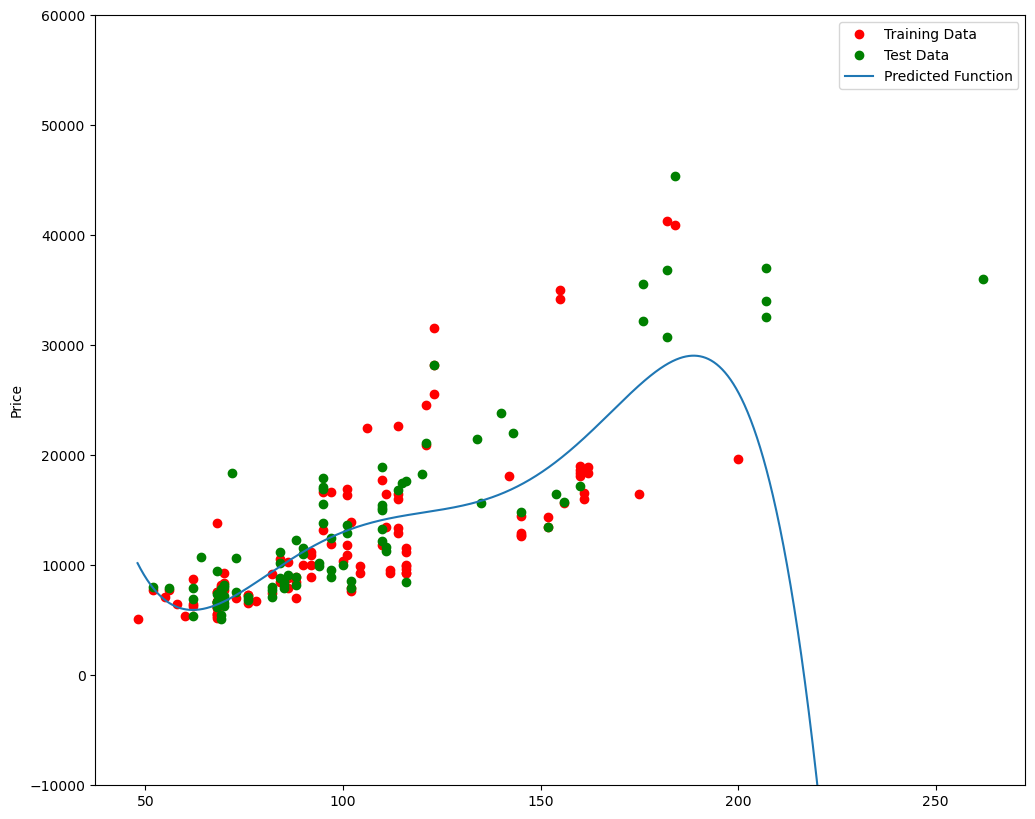

In [212]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

Gambar 3: Model regresi polinomial di mana titik merah mewakili data pelatihan, titik hijau mewakili data uji, dan garis biru mewakili prediksi model.

Kami melihat bahwa perkiraan fungsi muncul untuk melacak data tetapi sekitar 200 tenaga kuda, fungsi tersebut mulai menyimpang dari titik data.

In [213]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.5567716902638294

In [216]:
# R^2 of the test data

poly.score(x_test_pr, y_test)

-29.871426910506546

terlihat bahwa R^2 dari trainign data adalah 0.55 sedangkan dari test data adlaah -29.87. semakin rendah r^2 semakin buruk modelnya. negait R^2 artinya averfitting

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

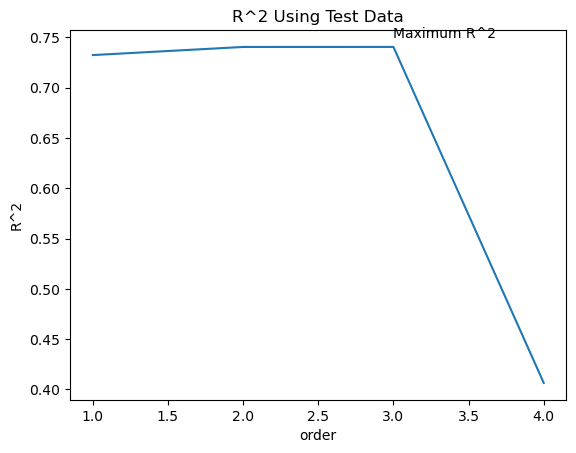

In [220]:
Rsqu_test = []  # Membuat list kosong untuk menyimpan nilai R-squared dari setiap model polinomial

order = [1, 2, 3, 4]  # Derajat polinomial yang akan dievaluasi
for n in order:
    pr = PolynomialFeatures(degree=n)  # Membuat objek PolynomialFeatures dengan derajat n
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])  # Melakukan transformasi polinomial pada data pelatihan
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])  # Melakukan transformasi polinomial pada data pengujian
    
    lr.fit(x_train_pr, y_train)  # Melatih model regresi linear dengan fitur hasil transformasi polinomial
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))  # Menghitung dan menyimpan nilai R-squared pada data pengujian

plt.plot(order, Rsqu_test)  # Membuat plot garis dengan derajat polinomial pada sumbu x dan nilai R-squared pada sumbu y
plt.xlabel('order')  # Memberi label pada sumbu x
plt.ylabel('R^2')  # Memberi label pada sumbu y
plt.title('R^2 Using Test Data')  # Memberi judul pada plot
plt.text(3, 0.75, 'Maximum R^2 ')  # Menambahkan teks pada plot sebagai keterangan


kita lihat bahwa R^2 perlahan naik sampai derajat tiga. kemudiam turum drastis saat derajat 4.

In [223]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [224]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.


In [238]:
pr1 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

In [239]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [240]:
x_train_pr1.shape

(110, 14)

In [241]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

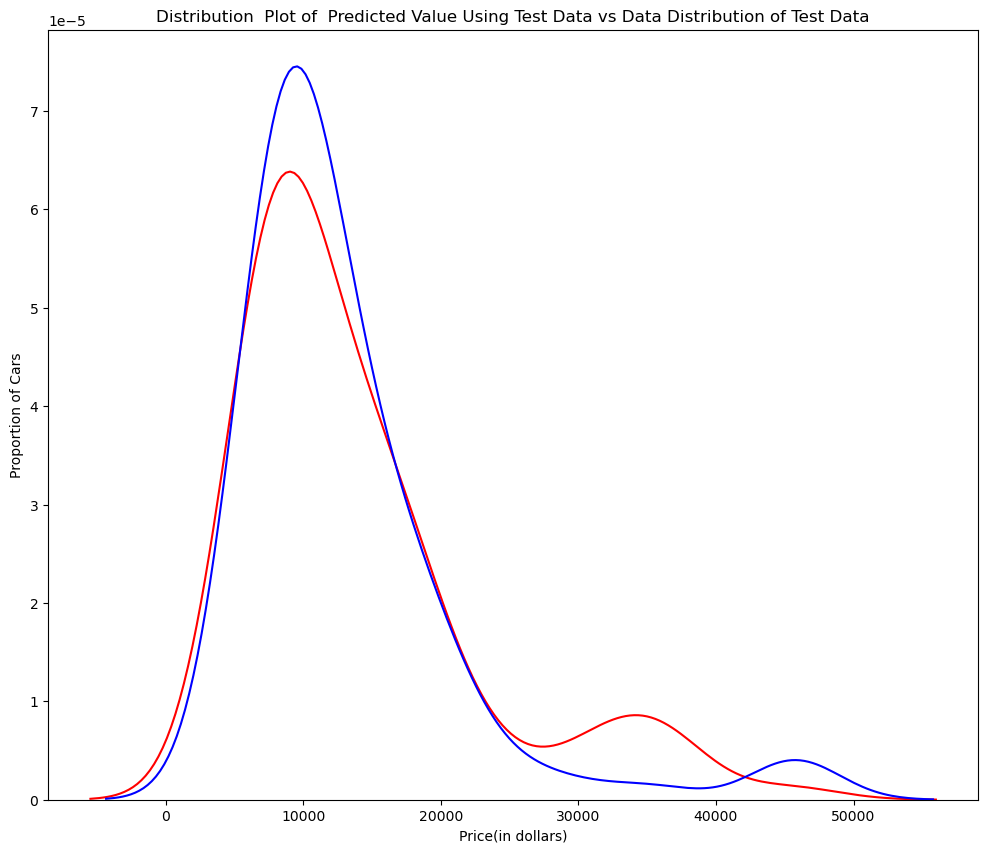

In [242]:

yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [243]:
print("predicted values:",yhat[0:4])
print("True values:",y_test[0:4].values)

predicted values: [ 6728.70635688  7308.02977067 12213.7853793  18893.18863048]
True values: [ 6295. 10698. 13860. 13499.]


## Part 3: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [244]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [245]:
# import ridgr from the module linear models

from sklearn.linear_model import Ridge

In [246]:
# create a ridge regression object, setting the regularization parameter (alpha) to 0.01

RigeModel = Ridge(alpha=1)

In [248]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [249]:
yhat = RigeModel.predict(x_test_pr)

In [250]:
# compare the rist five predictes samples to our test set:

print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set: [ 6295. 10698. 13860. 13499.]


Kami memilih nilai alpha yang meminimalkan kesalahan pengujian. Untuk melakukannya, kita dapat menggunakan for loop. Kami juga telah membuat bilah progres untuk melihat berapa banyak iterasi yang telah kami selesaikan sejauh ini.

In [254]:
from tqdm import tqdm

# Membuat dua list kosong untuk menyimpan skor R^2 pada data pengujian dan pelatihan.
Rsqu_test = []
Rsqu_train = []

# Membuat list kosong dummy1 yang tidak digunakan dalam kode ini.
dummy1 = []

# Membuat array Alpha yang berisi nilai-nilai dari 0 hingga 9990 dengan interval 10. Nilai-nilai ini akan digunakan sebagai nilai alpha dalam model Ridge.
Alpha = 10*np.array(range(0, 1000))

# membuat progress bar dengan memasukkan array Alpha sebagai argumen.
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    # Mengupdate tampilan progress bar dengan menambahkan informasi skor R^2 pada data pengujian dan pelatihan
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    # Menyimpan skor R^2 pada data pengujian dan pelatihan ke dalam list yang sesuai.
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 94.29it/s, Test Score=0.564, Train Score=0.859]


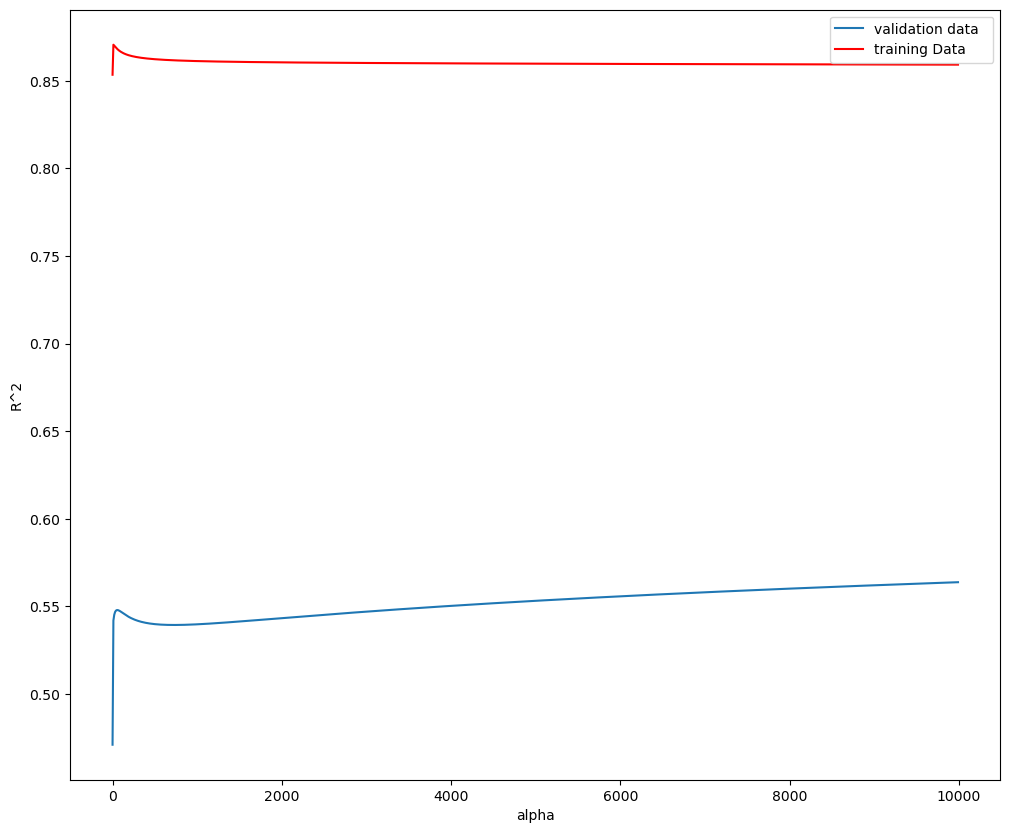

In [255]:
# plot out the values of R^2 for different alphas:

width: 12
height: 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Gambar 4: Garis biru mewakili R^2 dari data validasi, dan garis merah mewakili R^2 dari data pelatihan. Sumbu x mewakili nilai Alpha yang berbeda.

Di sini model dibangun dan diuji pada data yang sama, sehingga data pelatihan dan pengujiannya sama.

Garis merah pada Gambar 4 mewakili R^2 dari data pelatihan. Saat alfa meningkat, R^2 berkurang. Oleh karena itu, saat alfa meningkat, performa model menjadi lebih buruk pada data pelatihan

Garis biru mewakili R^2 pada data validasi. Saat nilai alfa meningkat, R^2 meningkat dan menyatu pada satu titik.

In [257]:
# calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207269

## Part 4: Grid Search

In [258]:
# Let's import GridSearchCV from the module model_selection.

from sklearn.model_selection import GridSearchCV

In [259]:
#  We create a dictionary of parameter values:

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [260]:
# Create a Ridge regression object

RR = Ridge()
RR

Ridge()

In [262]:
#  Create a ridge grid search object:

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [263]:
#  Fit the model:

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [264]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [265]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152